<a href="https://colab.research.google.com/github/rahulchandra2004/Weather-Data-Analysis-and-Prediction/blob/main/Weather_Data_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df=pd.read_csv("Weather_Dataset.csv")

In [3]:
print("Rows")
print(df.head())

Rows
       Date/Time  Temp_C  Dew Point Temp_C  Rel Hum_%  Wind Speed_km/h  \
0  1/1/2012 0:00    -1.8              -3.9         86                4   
1  1/1/2012 1:00    -1.8              -3.7         87                4   
2  1/1/2012 2:00    -1.8              -3.4         89                7   
3  1/1/2012 3:00    -1.5              -3.2         88                6   
4  1/1/2012 4:00    -1.5              -3.3         88                7   

   Visibility_km  Press_kPa               Weather  
0            8.0     101.24                   Fog  
1            8.0     101.24                   Fog  
2            4.0     101.26  Freezing Drizzle,Fog  
3            4.0     101.27  Freezing Drizzle,Fog  
4            4.8     101.23                   Fog  


In [4]:
print("\nInfo:")
print(df.info())


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB
None


In [5]:
print("\nColumn")
print(list(df.columns))


Column
['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather']


In [6]:
print("\nShape")
print(df.shape)


Shape
(8784, 8)


In [7]:
print("\nStatistics:")
print(df.describe())


Statistics:
            Temp_C  Dew Point Temp_C    Rel Hum_%  Wind Speed_km/h  \
count  8784.000000       8784.000000  8784.000000      8784.000000   
mean      8.798144          2.555294    67.431694        14.945469   
std      11.687883         10.883072    16.918881         8.688696   
min     -23.300000        -28.500000    18.000000         0.000000   
25%       0.100000         -5.900000    56.000000         9.000000   
50%       9.300000          3.300000    68.000000        13.000000   
75%      18.800000         11.800000    81.000000        20.000000   
max      33.000000         24.400000   100.000000        83.000000   

       Visibility_km    Press_kPa  
count    8784.000000  8784.000000  
mean       27.664447   101.051623  
std        12.622688     0.844005  
min         0.200000    97.520000  
25%        24.100000   100.560000  
50%        25.000000   101.070000  
75%        25.000000   101.590000  
max        48.300000   103.650000  


In [8]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64


In [9]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'], errors='coerce')

In [10]:
df=df.dropna(subset=['Date/Time','Temp_C'])

In [11]:
df=df.sort_values('Date/Time')

In [12]:
df['Year']=df['Date/Time'].dt.year
df['Month']=df['Date/Time'].dt.month
df['Day']=df['Date/Time'].dt.day
df['Hour']=df['Date/Time'].dt.hour

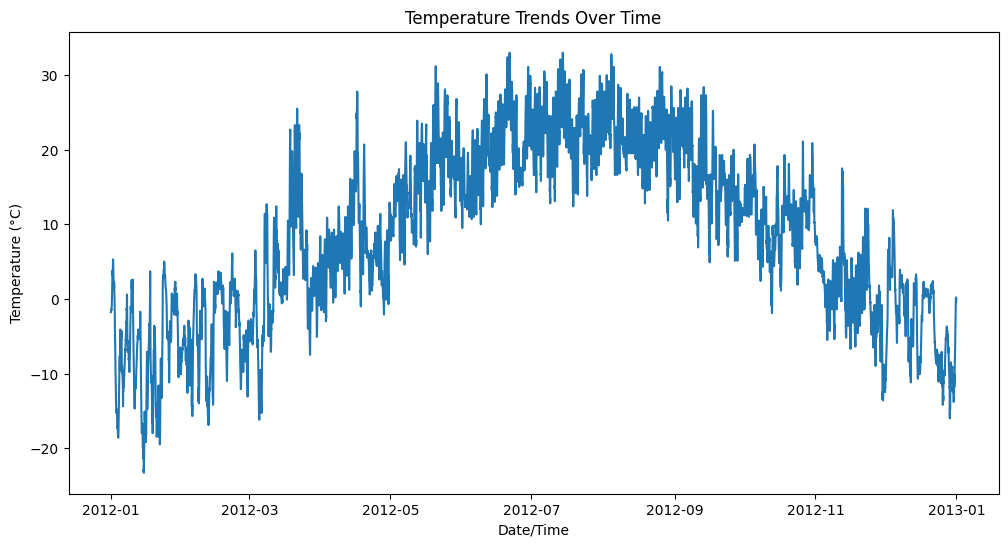

In [13]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Date/Time',y='Temp_C',data=df)
plt.title("Temperature Trends Over Time")
plt.xlabel("Date/Time")
plt.ylabel("Temperature (°C)")
plt.show()

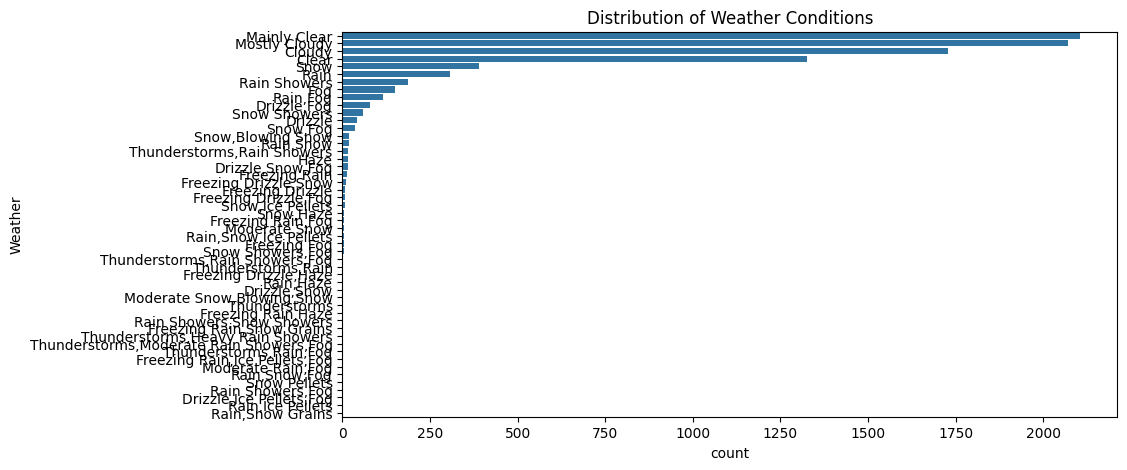

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(y='Weather',data=df,order=df['Weather'].value_counts().index)
plt.title("Distribution of Weather Conditions")
plt.show()

In [15]:

X=df[['Year','Month','Day','Hour','Rel Hum_%','Wind Speed_km/h','Visibility_km','Press_kPa']]
y=df['Temp_C']
lin_reg=LinearRegression()
lin_reg.fit(X,y)
y_pred=lin_reg.predict(X)
print("Regression R²:",r2_score(y,y_pred))
print("MSE:",mean_squared_error(y,y_pred))

Regression R²: 0.31477678377273277
MSE: 93.59535988012455


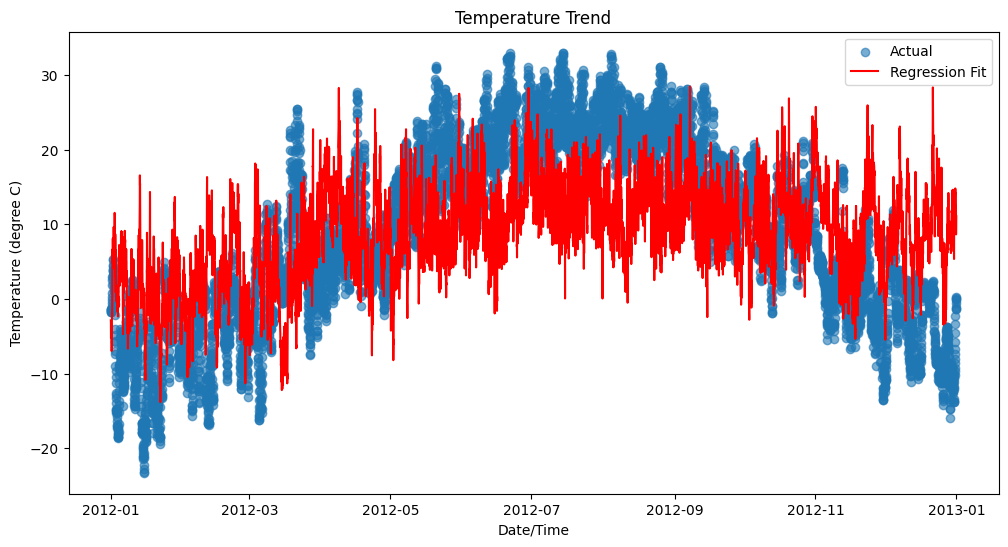

In [16]:
plt.figure(figsize=(12,6))
plt.scatter(df['Date/Time'],y,label="Actual",alpha=0.6)
plt.plot(df['Date/Time'],y_pred,color='red',label="Regression Fit")
plt.title("Temperature Trend")
plt.xlabel("Date/Time")
plt.ylabel("Temperature (degree C)")
plt.legend()
plt.show()

In [17]:
last_date=df['Date/Time'].max()
future_dates=pd.date_range(last_date,periods=25,freq='H')[1:]
last_row=df.iloc[-1]
future_df=pd.DataFrame({'Year':future_dates.year,'Month':future_dates.month,'Day':future_dates.day,'Hour':future_dates.hour,'Rel Hum_%':last_row['Rel Hum_%'],'Wind Speed_km/h':last_row['Wind Speed_km/h'],'Visibility_km':last_row['Visibility_km'],'Press_kPa':last_row['Press_kPa']
})
future_preds=lin_reg.predict(future_df)

/tmp/ipython-input-1599558366.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates=pd.date_range(last_date,periods=25,freq='H')[1:]


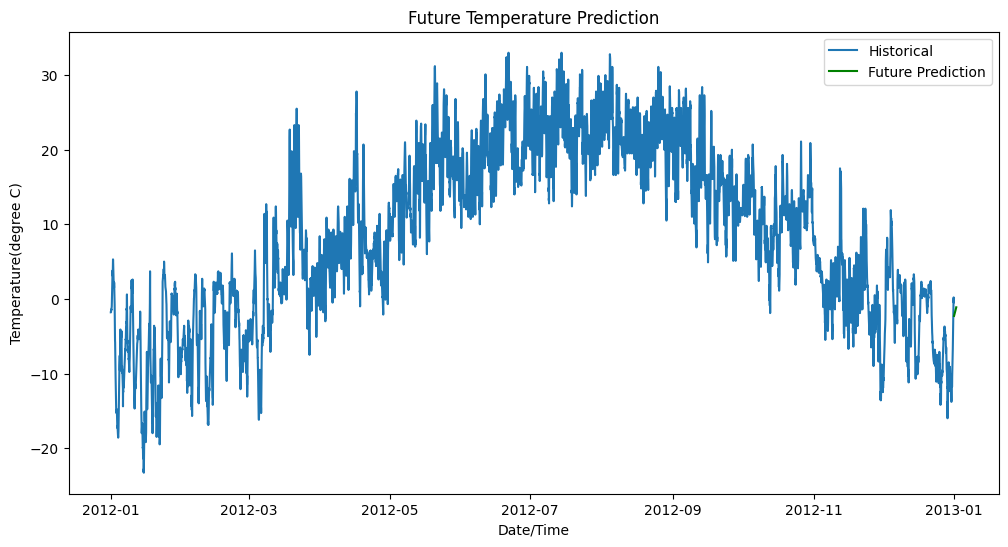

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df['Date/Time'],y,label="Historical")
plt.plot(future_dates, future_preds, color='green',label="Future Prediction")
plt.title("Future Temperature Prediction")
plt.xlabel("Date/Time")
plt.ylabel("Temperature(degree C)")
plt.legend()
plt.show()

In [19]:
print("\nFuture Temperature Predictions:")
for date,temp in zip(future_dates, future_preds):
    print(f"{date.strftime('%Y-%m-%d %H:%M')}->{temp:.2f} °C")


Future Temperature Predictions:
2013-01-01 00:00->-2.28 °C
2013-01-01 01:00->-2.23 °C
2013-01-01 02:00->-2.18 °C
2013-01-01 03:00->-2.13 °C
2013-01-01 04:00->-2.08 °C
2013-01-01 05:00->-2.03 °C
2013-01-01 06:00->-1.98 °C
2013-01-01 07:00->-1.93 °C
2013-01-01 08:00->-1.88 °C
2013-01-01 09:00->-1.83 °C
2013-01-01 10:00->-1.78 °C
2013-01-01 11:00->-1.73 °C
2013-01-01 12:00->-1.68 °C
2013-01-01 13:00->-1.63 °C
2013-01-01 14:00->-1.58 °C
2013-01-01 15:00->-1.53 °C
2013-01-01 16:00->-1.48 °C
2013-01-01 17:00->-1.43 °C
2013-01-01 18:00->-1.38 °C
2013-01-01 19:00->-1.33 °C
2013-01-01 20:00->-1.28 °C
2013-01-01 21:00->-1.23 °C
2013-01-01 22:00->-1.18 °C
2013-01-01 23:00->-1.13 °C
